## Test2: Sampling a multidimensional gaussian

In [1]:

import sys
import numpy as np

import os

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Code'))
from Adaptive_Sampler import Adaptive_Sampler




Define the probability distribution to be sampled.

In [2]:
# N-D gaussian
def ln_prob(p,p_true):
    return -np.sum((p-p_true)**2)/2.0



Initialise the distribution. Sample it starting from a bad guess, in steps of 1000 until convergence. Note how the $args$ argument is used to pass additional arguments to the ln_prob function.


R: [100. 100. 100. 100. 100. 100.]
alpha: [1. 1. 1. 1. 1.]

R: [45.41599688 21.89325144 23.35351977 61.77733624 78.4411154  18.21537494]
alpha: [1.1 1.1 1.1 1.1 1.1]

R: [1.33344838 1.38777178 1.31875477 1.39942869 1.35813791 1.29491797]
alpha: [1.21 1.1  1.21 1.21 1.21]

R: [1.09572906 1.09857532 1.1171849  1.10861982 1.11058829 1.08984298]
alpha: [1.21 1.1  1.21 1.21 1.21]

R: [1.14087678 1.15272004 1.14407253 1.15608608 1.1544951  1.1320138 ]
alpha: [1.21 1.1  1.21 1.21 1.21]

R: [1.11236099 1.11348943 1.11849719 1.10474792 1.11707065 1.10966667]
alpha: [1.21 1.1  1.21 1.21 1.21]

R: [1.09890696 1.09135085 1.09350981 1.08802345 1.0948867  1.09875227]
alpha: [1.21 1.1  1.21 1.21 1.21]


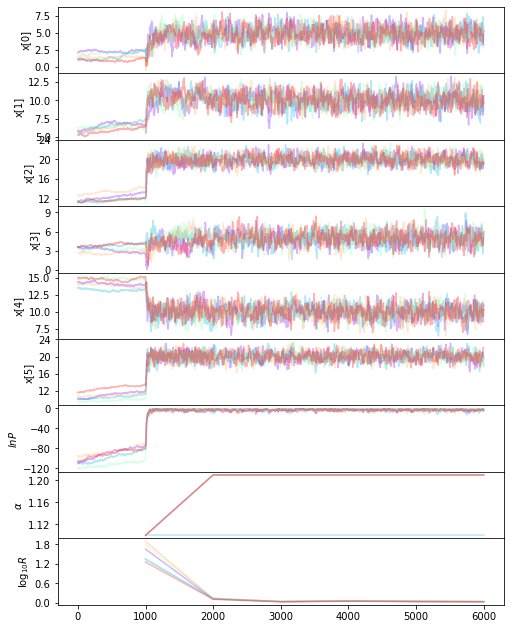

In [5]:


p_true = np.array([5.0,10.0,20.0,5,10,20])
p_guess = np.array([1.0,5.0,10.0,3,15,9])


ndim = p_true.shape[0]

nchains = 5

sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.02*np.ones(ndim),args=(p_true,))

while np.max(sampler.R) > 1.1:
    sampler.iterate_chains(1000,start=p_guess,plot_progress=False)
    print()
    print('R:',sampler.R)
    print('alpha:', sampler.alpha)

sampler.plot_chains(plot_to_file=False)




Now make a production run and examine the results with DFM's corner plot code.


R: [1.00952224 1.0092852  1.00945467 1.00982422 1.00971497 1.00980485]
alpha: [1.21 1.1  1.21 1.21 1.21]

parameter means and uncertainties:
[(5.041422129601798, 1.0028775811197326, 0.985316892048778), (9.968262416079142, 1.0403656423634597, 1.0034599506824087), (20.002001200559846, 0.9859704265118481, 1.009845552210443), (4.980877278420653, 1.0019779203505417, 0.9817337926643543), (9.973978577708607, 0.9792844263142229, 0.9736103311089064), (19.972360323699277, 1.0100454968012258, 0.9676962170907402)]


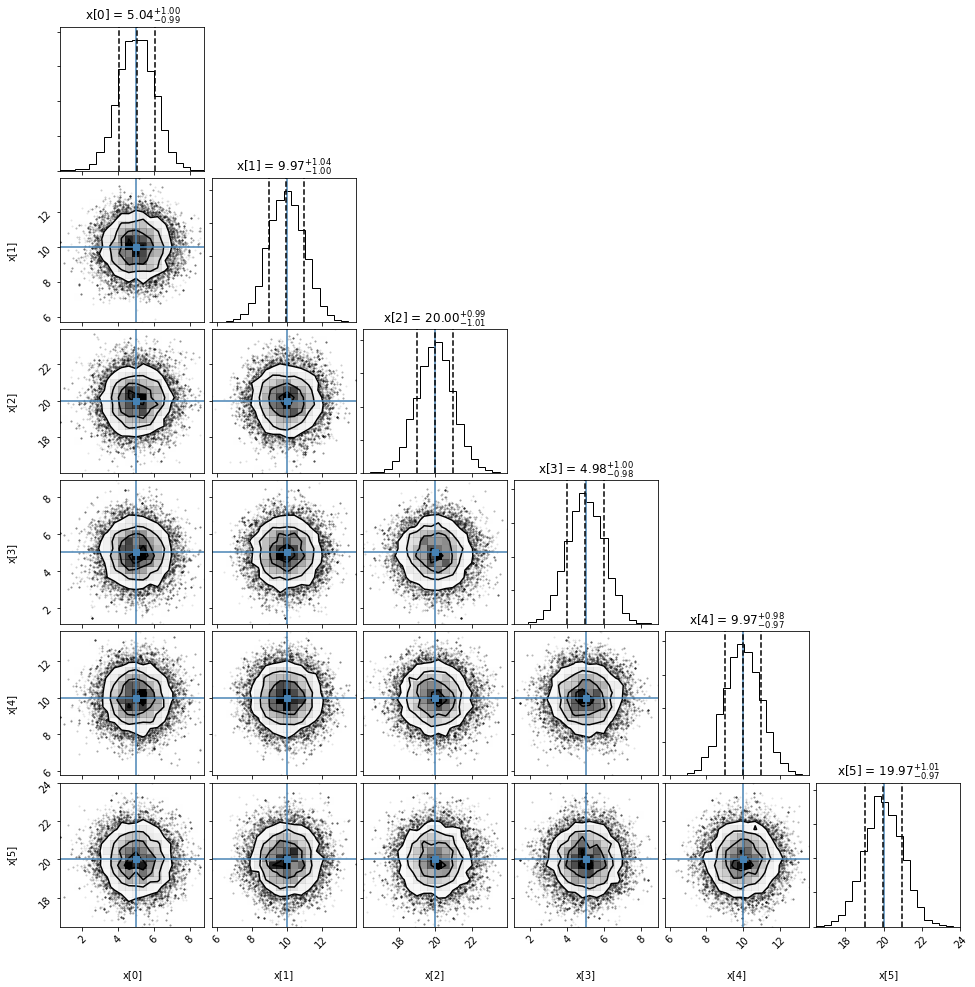

In [9]:
nsteps = 10000
sampler.reset()

sampler.iterate_chains(nsteps)
print()
print('R:',sampler.R)
print('alpha:', sampler.alpha)

params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
                zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
                [16, 50, 84], axis=0))))

print()
print('parameter means and uncertainties:')
print(params)

sampler.plot_chain_corner(nsteps=nsteps,plot_to_file=False,corner_kwargs={'truths':p_true})


